# Vis Feature Map

In [1]:
import _init_paths
from fast_rcnn.config import cfg
from fast_rcnn.test import feat_extract
from fast_rcnn.nms_wrapper import nms
from utils.timer import Timer
import matplotlib.pyplot as plt
%matplotlib inline
# set display defaults
plt.rcParams['figure.figsize'] = (16, 16)        # large images
plt.rcParams['image.interpolation'] = 'nearest'  # don't interpolate: show square pixels
plt.rcParams['image.cmap'] = 'gray'  # use grayscale output rather than a (potentially misleading) color heatmap
import numpy as np
import scipy.io as sio
import caffe, os, sys, cv2
import argparse

In [2]:
CLASSES = ('__background__',
           'aeroplane', 'bicycle', 'bird', 'boat',
           'bottle', 'bus', 'car', 'cat', 'chair',
           'cow', 'diningtable', 'dog', 'horse',
           'motorbike', 'person', 'pottedplant',
           'sheep', 'sofa', 'train', 'tvmonitor')

In [3]:
def vis_square(data):
    """Take an array of shape (n, height, width) or (n, height, width, 3)
       and visualize each (height, width) thing in a grid of size approx. sqrt(n) by sqrt(n)"""
    
    # normalize data for display
    data = (data - data.min()) / (data.max() - data.min())
    
    # force the number of filters to be square
    n = int(np.ceil(np.sqrt(data.shape[0])))
    padding = (((0, n ** 2 - data.shape[0]),
               (0, 1), (0, 1))                 # add some space between filters
               + ((0, 0),) * (data.ndim - 3))  # don't pad the last dimension (if there is one)
    data = np.pad(data, padding, mode='constant', constant_values=1)  # pad with ones (white)
    
    # tile the filters into an image
    data = data.reshape((n, n) + data.shape[1:]).transpose((0, 2, 1, 3) + tuple(range(4, data.ndim + 1)))
    data = data.reshape((n * data.shape[1], n * data.shape[3]) + data.shape[4:])
    
    plt.imshow(data); plt.axis('off')

In [4]:
cfg.TEST.HAS_RPN = True
prototxt = '../models/pascal_voc/VGG16/faster_rcnn_end2end/test.prototxt'
caffemodel = '../output/faster_rcnn_end2end/voc_2007_trainval/vgg16_faster_rcnn_iter_70000.caffemodel'

In [5]:
caffe.set_mode_gpu()
caffe.set_device(0)

In [6]:
net = caffe.Net(prototxt, caffemodel, caffe.TEST)

In [7]:
im_file = '../data/demo/000456.jpg'
im = cv2.imread(im_file)

In [9]:
feat, rois = feat_extract(net, im, blob_names=['data', 'conv5_3', 'pool5', 'pool_1x1', 'pool_2x2'])

In [11]:
print feat.keys()
print rois.shape

['pool_2x2', 'pool_1x1', 'data', 'pool5', 'conv5_3']
(300, 5)


In [12]:
print feat['conv5_3'].shape

(1, 512, 38, 50)


(1, 600, 800)


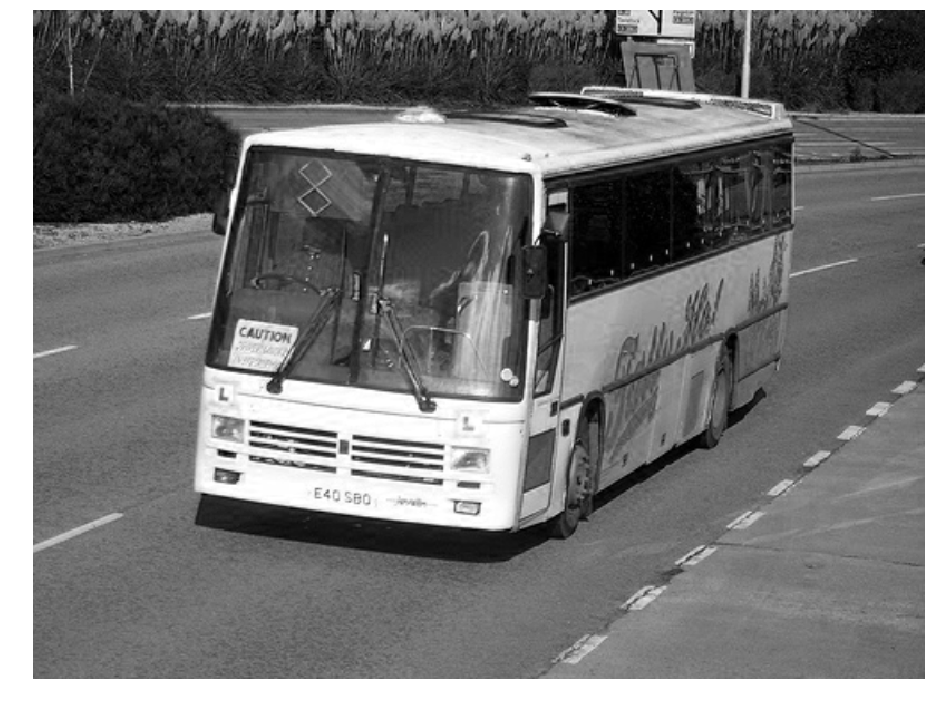

In [13]:
print feat['data'][0,:1].shape
vis_square(feat['data'][0,:1])

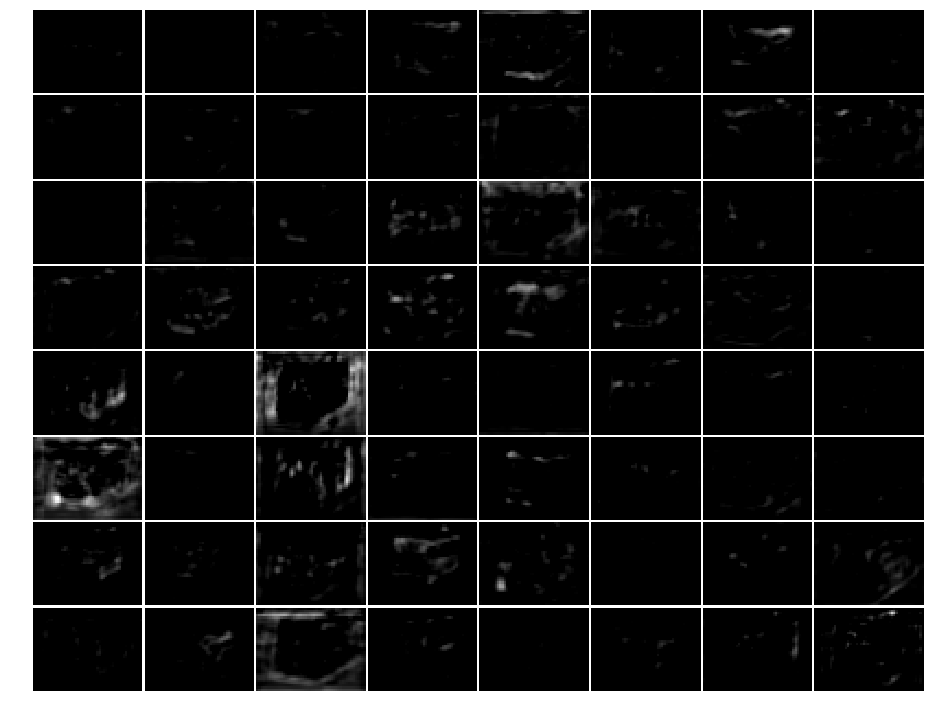

In [14]:
vis_square(feat['conv5_3'][0,:64])

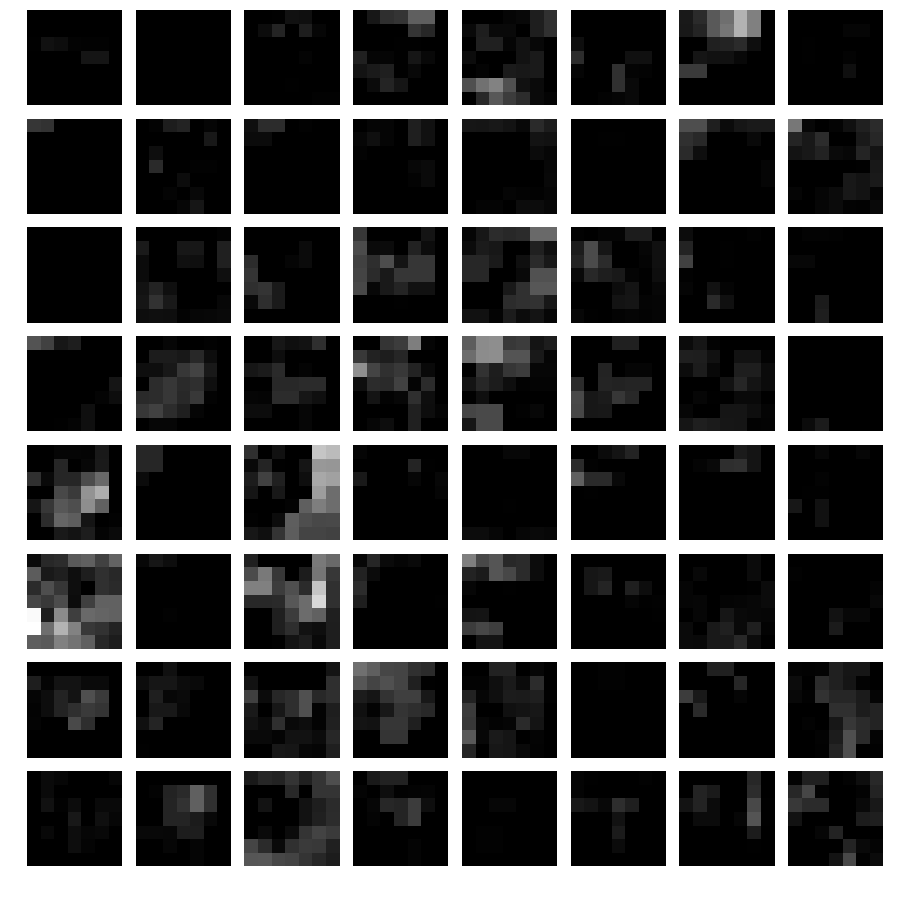

In [15]:
vis_square(feat['pool5'][0,:64])

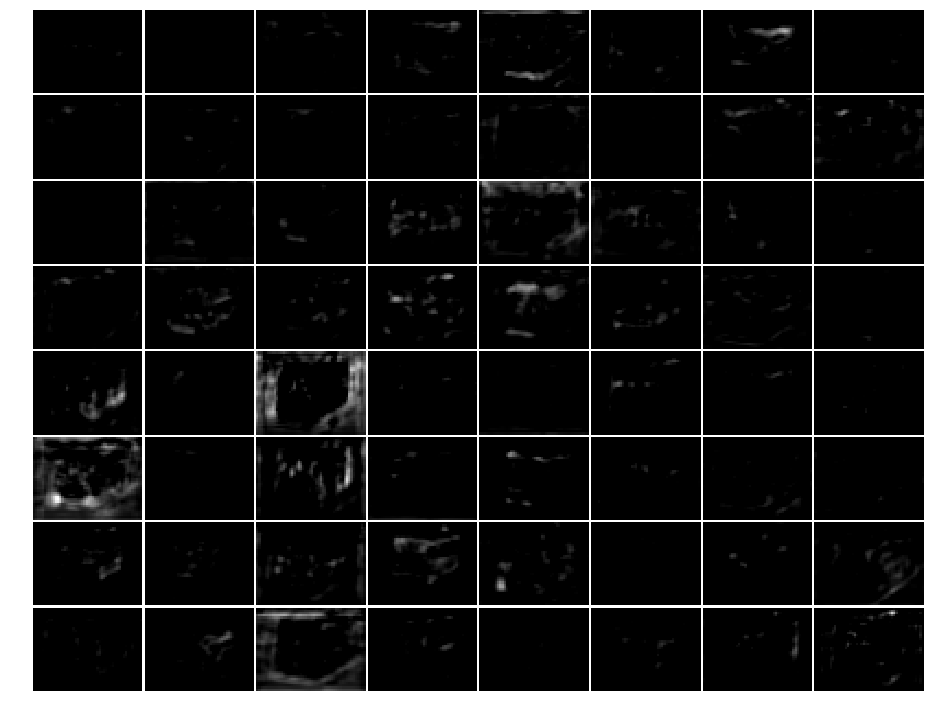

In [16]:
vis_square(feat['pool_1x1'][0,:64])

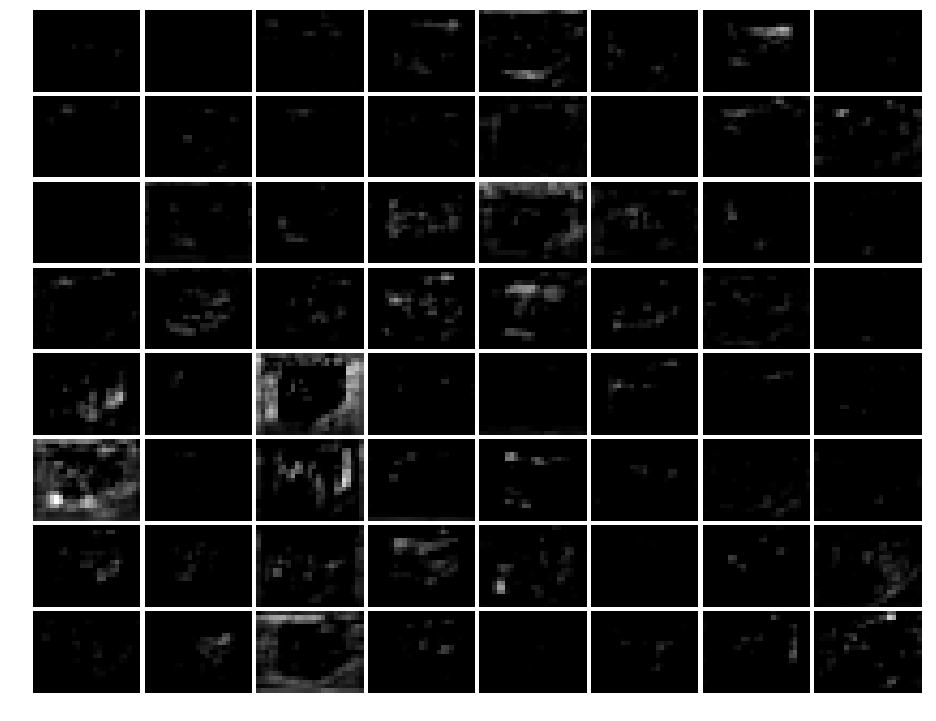

In [17]:
vis_square(feat['pool_2x2'][0,:64])